<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#План-проекта" data-toc-modified-id="План-проекта-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План проекта</a></span></li><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Загрузка-и-исследовательский-анализ-данных" data-toc-modified-id="Загрузка-и-исследовательский-анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Загрузка и исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Train-dataset" data-toc-modified-id="Train-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train dataset</a></span></li><li><span><a href="#CrowdAnnotations" data-toc-modified-id="CrowdAnnotations-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>CrowdAnnotations</a></span></li><li><span><a href="#ExpertAnnotations" data-toc-modified-id="ExpertAnnotations-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ExpertAnnotations</a></span></li><li><span><a href="#Test_queries" data-toc-modified-id="Test_queries-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Test_queries</a></span></li><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Выделение-датафрейма-&quot;идеальных-совпадений&quot;" data-toc-modified-id="Выделение-датафрейма-&quot;идеальных-совпадений&quot;-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Выделение датафрейма "идеальных совпадений"</a></span></li><li><span><a href="#Объединение-данных---нужно-ли?" data-toc-modified-id="Объединение-данных---нужно-ли?-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Объединение данных - нужно ли?</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span><ul class="toc-item"><li><span><a href="#Соблюдение-юридических-ограничений" data-toc-modified-id="Соблюдение-юридических-ограничений-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Соблюдение юридических ограничений</a></span></li><li><span><a href="#Преобразование-изображений-в-вектор" data-toc-modified-id="Преобразование-изображений-в-вектор-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Преобразование изображений в вектор</a></span></li><li><span><a href="#Преобразование-текстов-в-вектор" data-toc-modified-id="Преобразование-текстов-в-вектор-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Преобразование текстов в вектор</a></span></li><li><span><a href="#Описание-полученных-данных" data-toc-modified-id="Описание-полученных-данных-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Описание полученных данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></div>

# Проект: Поиск по изображениям

## Описание проекта

**Идея PoC (Proof of Concept, Проверка концепции) проекта:**

Разработать демонстрационную версию сервиса поиска изображений по текстовым описаниям, 
которая будет использовать нейросетевые модели для оценки соответствия между текстом и изображением.

**Юридические ограничения:** в некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений:  поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержание описание, изображение или запись голоса детей. Ребенком считается любой человек, не достигший возраста 16-ти лет.

При попытке посмотреть изображения, запрещенные законодательством, вместо картинок показывается дисклеймер: `This image is unavaliable in your country in compliance with local laws`.

Тренировочные данные необходимо очистить от проблемного контента. Во время тестирования модели при появлении в запросе "вредного" контента должен отображаться дисклеймер.

## Описание данных

Данные доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## План проекта

1. **Исследовательский анализ данных**:
   - Загрузить и прочесть данные из файлов
   - Проверить и удалить дубликаты и некачественные данные.


2. **Подготовка данных к обучению модели**:
   - Удалить данные, нарушающие юридические ограничения (например, изображения детей).
   - Преобразование текстов с помощью одного из трех методов (TF-IDF, BERT, word2vec).
   - Преобразование изображений в векторные представления с использованием модели ResNet50.
   - Дать описание получившихся пар векторов с точки зрения их размерностей.


3. **Обучение моделей**:
   - Создать модель, которая покажет близость двух векторов. Модель должна принимать на вход конкатенированный вектор, состоящий из векторов описания и изображений, и предсказывать итоговую оценку экспертов.
   - Выбрать метрику, по которой мы будем сравнивать точность различных моделей.
   - Обучить несколько моделей с подбором гиперпараметров, среди которых обязательно нужно рассмотреть Линейную регрессию и Полносвязную нейронную сеть.


4. **Тестирование моделей**:
   - Выбрать лучшую модель.
   - Произвести ее тестирование на тестовых данных.
   - Написать функцию, которая принимает на вход текстовое описание, делает его векторизацию и возвращает картинку с максимальным значением метрики.
   - С помощью функции протестировать работу модели на нескольких тестовых описаниях. 


5. **Сравнение моделей**:
   - Описать лучшую модель.
   - Описать, какие ошибки допускает модель во время поиска картинки по ее текстовому описанию.
   - Оценить, насколько проект по созданию сервиса поиска фотографии по текстовому описанию практически осуществим.

## Загрузка библиотек

In [ ]:
# устанавливаем библиотеку

#! pip install clip -q

In [ ]:
#!pip install keras_nlp -q

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import nltk
import re  
import tqdm

#import clip
#import keras_nlp

import tensorflow as tf

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from pathlib import Path
from PIL import Image


from tqdm import tqdm
from tqdm import notebook
tqdm.pandas()


from sklearn.model_selection import GroupShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 

from tensorflow import keras
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import preprocess_input

In [2]:
nltk.download('stopwords') 
nltk.download('punkt') 
nltk.download('wordnet') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ElenaB\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ElenaB\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ElenaB\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Загрузка и исследовательский анализ данных

In [3]:
# путь к файлам, чтобы можно было использовать другое местоположение

try:
    data_path = "C:\\Users\\ElenaB\\Projects\\pj_19\\to_upload"
except:
    data_path = "https://github.com/BelkaBoguto/pj_19/tree/main/to_upload"

In [4]:
# путь к изображениям


train_images_path = os.path.join(data_path, 'train_images')

test_images_path = os.path.join(data_path, 'test_images')

### Train dataset

In [5]:
# откроем файл с данными для обучения

data_train = pd.read_csv(os.path.join(data_path, 'train_dataset.csv'))

In [6]:
# посмотрим информацию о файле

data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [7]:
# посмотрим образец данных

data_train.head(10)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


In [8]:
# посмотрим на количество уникальных значений в колонках

for i in data_train.columns:
    print(i, data_train[i].nunique())

image 1000
query_id 977
query_text 977


Не совсем понимаю, почему для десяти первых изображений в таблице зафиксированы одинаковые текстовые запросы и их идентификаторы. Обещано было следующее: "Для одной картинки может быть доступно до 5 описаний." И если у нас есть одно описание для минимум 10 картинок, а всего таких уникальных описаний - 977, а строк в данных 5822, то что-то не сходится.

In [9]:
# посмотрим данные таблицы для первого изображения

data_train.query('image == "1056338697_4f7d7ce270.jpg"')

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
12,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...
22,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .
27,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,A woman plays with long red ribbons in an empt...
31,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,Chinese market street in the winter time .
38,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,A soccer ball is above the head of a man weari...
44,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,A young boy dressed in a red uniform kicks the...
59,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,A man and woman look back at the camera while ...


Восемь описаний. Не пять, как было указано в постановке задачи.

При этом, можно заметить, что в первых десяти строках датафрейма в 4 строке название изображения и название его в идентификаторе совпадают. Возможно, это "истинное совпадение". 

А для первого изображения "истинного совпадения" нет.

In [10]:
# а если посмотреть для первого идентификатора описания

data_train.query('query_id == "2549968784_39bfbe44f9.jpg#2"')

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...


Двенадцать изображений к одному описанию. И только одно предположительно истинное.

### CrowdAnnotations

In [11]:
# посмотрим второй файл

data_crowd = pd.read_csv(os.path.join(data_path, 'CrowdAnnotations.tsv'), sep='\t', 
                        names = ['image', 'query_id', 'perc_pos', 'num_pos', 'num_neg'])

In [12]:
# посмотрим информацию о нем

data_crowd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47830 entries, 0 to 47829
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image     47830 non-null  object 
 1   query_id  47830 non-null  object 
 2   perc_pos  47830 non-null  float64
 3   num_pos   47830 non-null  int64  
 4   num_neg   47830 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.8+ MB


In [13]:
# посмотрим первые строки

data_crowd.head(10)

,image,query_id,perc_pos,num_pos,num_neg
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


В выборку попало истинное сочетание - первая строка. Но, например, в 8 строке один проверяющий также обнаружил сходство в изображении с текстом запроса.

И снова можно видеть, что для одного изображения у нас много строк с текстовыми запросами.

In [14]:
# посмотрим на количество уникальных значений в колонках

for i in data_crowd.columns:
    print(i, data_crowd[i].nunique())

image 1000
query_id 1000
perc_pos 12
num_pos 6
num_neg 7


In [15]:
# посмотрим данные таблицы для первого изображения

data_crowd.query('image == "1056338697_4f7d7ce270.jpg"')

,image,query_id,perc_pos,num_pos,num_neg
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.000000,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.000000,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.000000,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.000000,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.000000,0,3
5,1056338697_4f7d7ce270.jpg,2204550058_2707d92338.jpg#2,0.000000,0,3
6,1056338697_4f7d7ce270.jpg,2224450291_4c133fabe8.jpg#2,0.000000,0,3
7,1056338697_4f7d7ce270.jpg,2248487950_c62d0c81a9.jpg#2,0.333333,1,2
8,1056338697_4f7d7ce270.jpg,2307118114_c258e3a47e.jpg#2,0.000000,0,3
9,1056338697_4f7d7ce270.jpg,2309860995_c2e2a0feeb.jpg#2,0.000000,0,3


In [16]:
# а если посмотреть для первого идентификатора описания

data_crowd.query('query_id == "2549968784_39bfbe44f9.jpg#2"')

,image,query_id,perc_pos,num_pos,num_neg
12,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
69,106490881_5a2dd9b7bd.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
861,1224851143_33bcdd299c.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
917,1237985362_dbafc59280.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
1376,1287475186_2dee85f1a5.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
...,...,...,...,...,...
45556,537532165_e4b7c0e61a.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
45678,539751252_2bd88c456b.jpg,2549968784_39bfbe44f9.jpg#2,0.333333,1,2
45874,542317719_ed4dd95dc2.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3
45926,543007912_23fc735b99.jpg,2549968784_39bfbe44f9.jpg#2,0.000000,0,3


По 50 запросов к одной картинке. И по 66 картинок к одному запросу. Но соответствие достигается редко. Возможно, запросы слишком подробные? И обилие деталей в запросе отделяет его от совпадения. Посмотрим, как часто в этом файле встречаются совпадения в запросе и изображении.

In [17]:
data_crowd['perc_pos'].value_counts()

0.000000    41970
0.333333     3000
0.666667     1360
1.000000     1323
0.250000       96
0.500000       27
0.200000       22
0.750000        9
0.400000        8
0.600000        8
0.800000        4
0.166667        3
Name: perc_pos, dtype: int64

1323 раза было отмечено, что изображения полностью соответствуют запросу. И почти 42000 раз было отмечено, что изображение не соответствует запросу.

В общем, кажется логичным, что модели было бы полезно знать не только какие изображения подходят к запросу, но и какие точно не подходят к запросу. Но по условию мы должны предсказать оценку экспертов, не краудсорсинга.

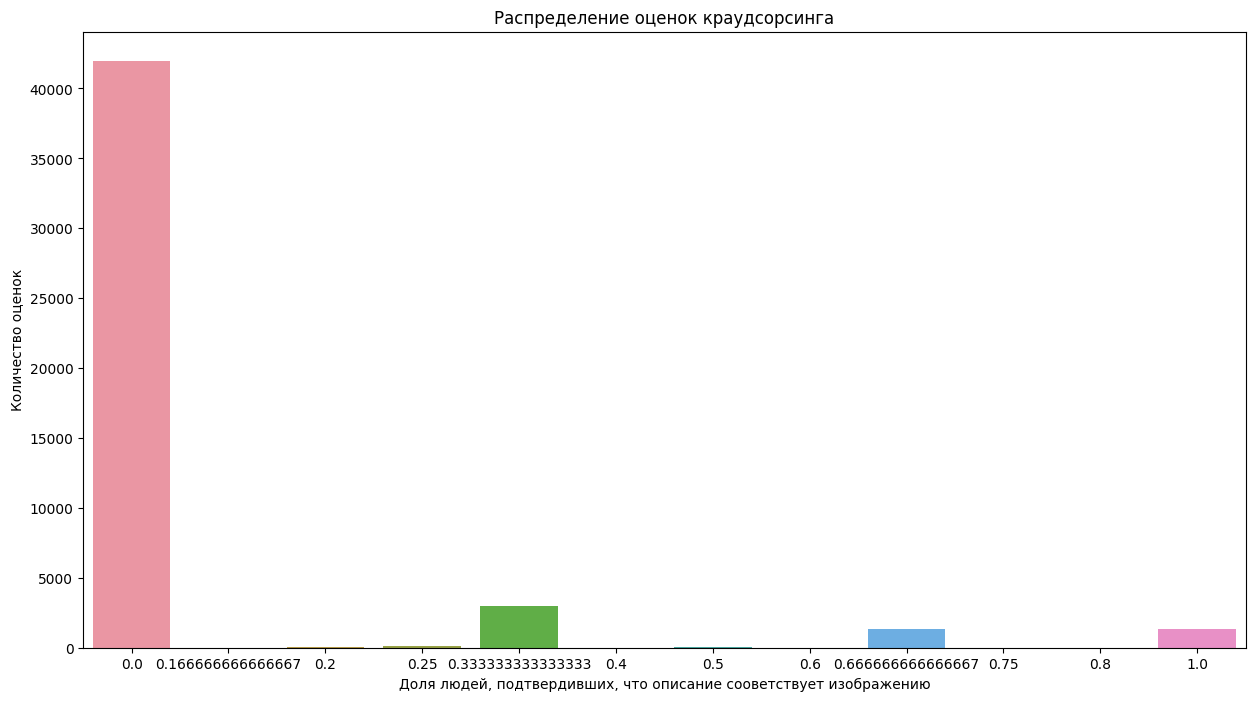

In [18]:
plt.rcParams['figure.figsize'] = [15, 8]
sns.countplot(data=data_crowd, x='perc_pos');
plt.title('Распределение оценок краудсорсинга');
plt.ylabel('Количество оценок');
plt.xlabel('Доля людей, подтвердивших, что описание сооветствует изображению');

### ExpertAnnotations

In [19]:
# посмотрим третий файл

data_expert = pd.read_csv(os.path.join(data_path, 'ExpertAnnotations.tsv'), sep='\t', 
                        names = ['image', 'query_id', 'first', 'second', 'third'])

In [20]:
# посмотрим информацию о нем

data_expert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   first     5822 non-null   int64 
 3   second    5822 non-null   int64 
 4   third     5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [21]:
# посмотрим первые строки

data_expert.head(10)

,image,query_id,first,second,third
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2
5,1056338697_4f7d7ce270.jpg,3360930596_1e75164ce6.jpg#2,1,1,1
6,1056338697_4f7d7ce270.jpg,3545652636_0746537307.jpg#2,1,1,1
7,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2
8,106490881_5a2dd9b7bd.jpg,1425069308_488e5fcf9d.jpg#2,1,1,1
9,106490881_5a2dd9b7bd.jpg,1714316707_8bbaa2a2ba.jpg#2,2,2,2


Для начала, в этом файле у нас столько же записей, сколько и в обучающем файле. Можно предположить, что изображения и идентификаторы запросов в этих файлах совпадут. Для первой картинки у нас представлено 8 описаний, как и в первом файле.

Посмотрим, одинаково ли оценивали эксперты данные:

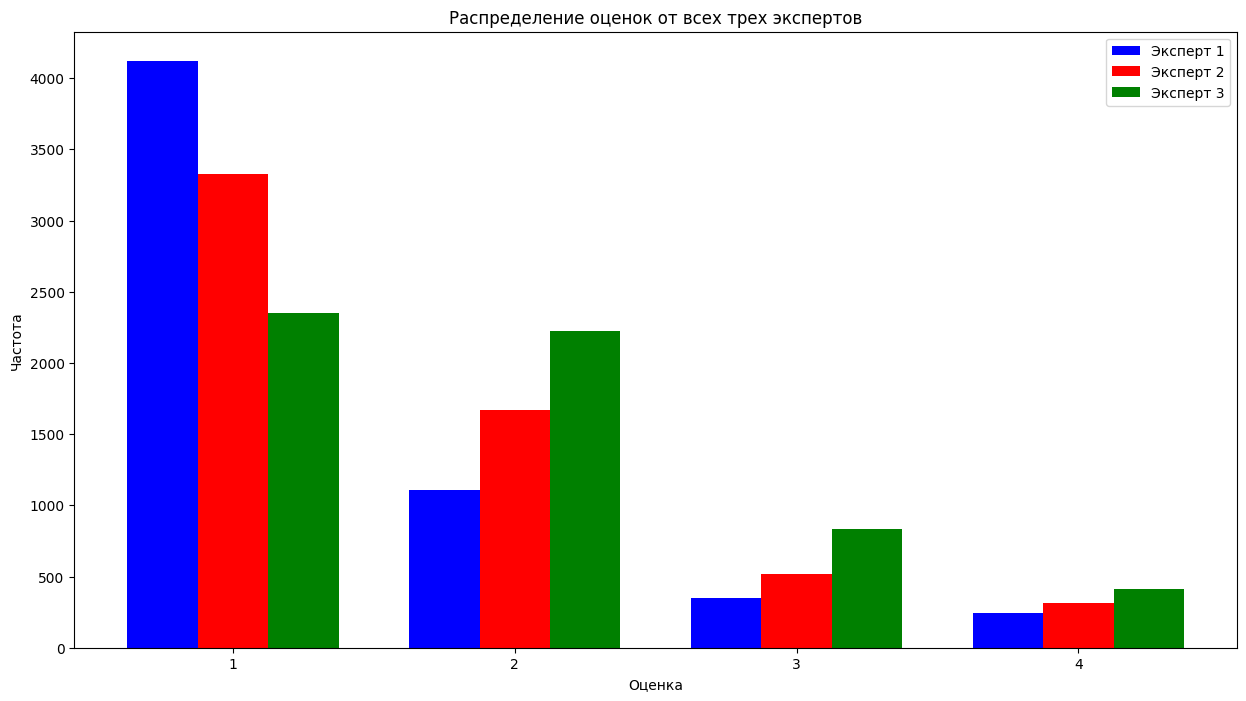

In [22]:
# Подготовка данных

score_counts = data_expert[['first', 'second', 'third']].apply(pd.Series.value_counts).fillna(0).astype(int)
score_counts.index.name = 'score'
score_counts = score_counts.reset_index()

# Построение г-ка

bar_width = 0.25
x = score_counts['score']

plt.bar(x - bar_width, score_counts['first'], width=bar_width, label='Эксперт 1', color='blue')
plt.bar(x, score_counts['second'], width=bar_width, label='Эксперт 2', color='red')
plt.bar(x + bar_width, score_counts['third'], width=bar_width, label='Эксперт 3', color='green')

plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок от всех трех экспертов')
plt.xticks(x)
plt.legend(loc='upper right')
plt.show()

Напомним значение оценок: 
- 1 — изображение и запрос совершенно не соответствуют друг другу, 
- 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 
- 3 — запрос и текст соответствуют с точностью до некоторых деталей, 
- 4 — запрос и текст соответствуют полностью. 

Эксперт 1 - очень строг в оценках. Наибольшая доля оценок "1" и наименьшая доля оценок "4".   
Эксперт 3 - наоборот, наиболее мягок в оценках - наименьшая доля оценок "1", много оценок "2", и наибольшая доля оценок "4".   
Эксперт 2 - нечто среднее между ними.   

Получается, что для 1000 изображений, описание к которым предоставлено авторами фото и пользователями, не более 500 описаны корректно с точки зрения экспертов.

### Test_queries

In [23]:
# откроем файл с  тестовыми данными

data_test = pd.read_csv(os.path.join(data_path, 'test_queries.csv'), sep="|", index_col=0)

In [24]:
# посмотрим информацию о нем

data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   query_id    500 non-null    object
 1   query_text  500 non-null    object
 2   image       500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [25]:
# посмотрим первые строки

data_test.head(10)

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt an...",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at eac...,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each oth...,1177994172_10d143cb8d.jpg
5,1232148178_4f45cc3284.jpg#0,A baby girl playing at a park .,1232148178_4f45cc3284.jpg
6,1232148178_4f45cc3284.jpg#1,A closeup of a child on a playground with adul...,1232148178_4f45cc3284.jpg
7,1232148178_4f45cc3284.jpg#2,A young boy poses for a picture in front of a ...,1232148178_4f45cc3284.jpg
8,1232148178_4f45cc3284.jpg#3,A young girl is smiling in front of the camera...,1232148178_4f45cc3284.jpg
9,1232148178_4f45cc3284.jpg#4,There is a little blond hair girl with a green...,1232148178_4f45cc3284.jpg


Можно заметить, что в **тренировочных** данных, в оценках экспертов и краудсорсинге используется только "второе" описание запроса. А вот в **тестовых данных** у нас появились те самые "пять описаний на изображение", о которых говорилось в задании.

In [26]:
# посмотрим на количество уникальных значений в колонках

for i in data_test.columns:
    print(i, data_test[i].nunique())

query_id 500
query_text 500
image 100


### Проверка на дубликаты

In [27]:
print(data_train.duplicated().sum())
print(data_crowd.duplicated().sum())
print(data_expert.duplicated().sum())
data_test.duplicated().sum()

0
0
0


0

### Выделение датафрейма "идеальных совпадений"

In [28]:
# добавим колонку с номером изображения из описания

data_train['image_from_query_id'] = data_train['query_id'].apply(lambda x: x.split('#2')[0])

In [29]:
# сформируем и посчитаем "идеальные сочетания"

matches = data_train[data_train['image'] == data_train['image_from_query_id']]
mismatches = data_train[data_train['image'] != data_train['image_from_query_id']]
num_matches = len(matches)
num_mismatches = len(mismatches)
print(f"Количество совпадающих пар: {num_matches}")
print(f"Количество несоответствующих пар: {num_mismatches}")


# Вывод первых нескольких строк для проверки совпадений и несоответствий

print("Пример совпадающих пар:")
display(matches.sample(3))

Количество совпадающих пар: 158
Количество несоответствующих пар: 5664
Пример совпадающих пар:


,image,query_id,query_text,image_from_query_id
2774,3627011534_485f667b10.jpg,3627011534_485f667b10.jpg#2,A young girl is wearing a purple shirt and pin...,3627011534_485f667b10.jpg
1199,3413571342_b9855795e2.jpg,3413571342_b9855795e2.jpg#2,A surfer rides a wave in a clear blue ocean .,3413571342_b9855795e2.jpg
416,3245460937_2710a82709.jpg,3245460937_2710a82709.jpg#2,A child jumping on a tennis court .,3245460937_2710a82709.jpg


В тренировочных данных у нас 158 пар "идеальных совпадений". Можно будет попробовать обучить модель именно на них.

Посмотрим на примеры таких изображений.

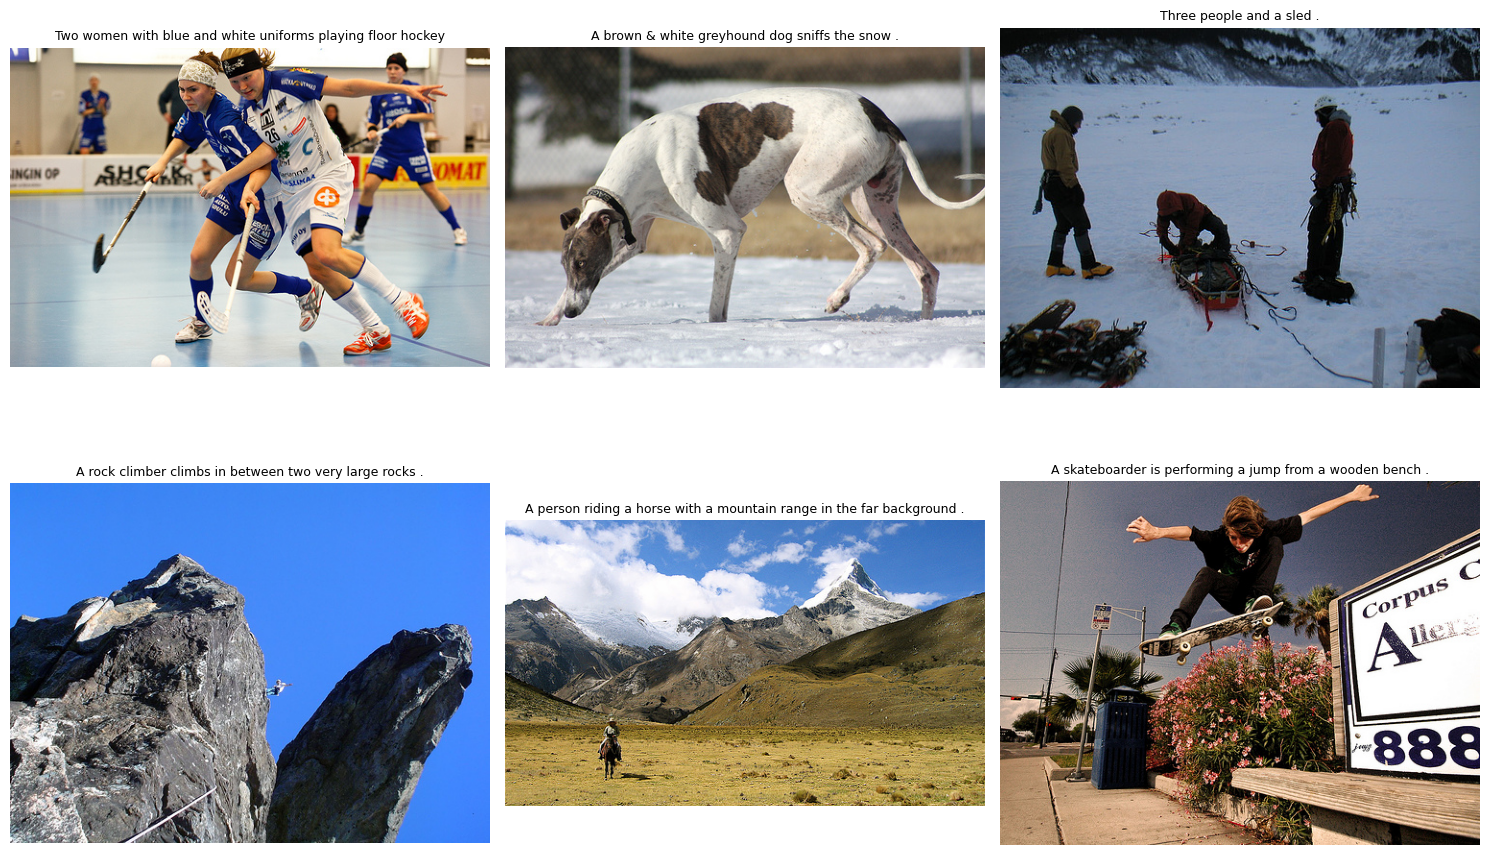

In [30]:
# Выбор 6 случайных идеально подходящих пар

sampled_matches = matches.sample(6)


# Функция для отображения изображения и его описания

def display_image_and_description(ax, image_filename, description):
     image_path = os.path.join(train_images_path, image_filename)
     img = mpimg.imread(image_path)
     ax.imshow(img)
     ax.axis('off')
     ax.set_title(description, fontsize=9)

        
# Создание сетки фото 3 на 2 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, (idx, row) in enumerate(sampled_matches.iterrows()):
    ax = axes[i // 3, i % 3]
    display_image_and_description(ax, row['image'], row['query_text'])

plt.tight_layout()
plt.show()

In [31]:
# сохраним наш "идеальный" датафрейм 

matches = matches.drop(columns = ['image_from_query_id'], axis=1)
matches.head()

,image,query_id,query_text
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...
16,2718495608_d8533e3ac5.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...
74,1425069308_488e5fcf9d.jpg,1425069308_488e5fcf9d.jpg#2,A white dog jumps to catch a blue ball in a li...
86,2140182410_8e2a06fbda.jpg,2140182410_8e2a06fbda.jpg#2,The kid is on a float in the snow .
110,3119076670_64b5340530.jpg,3119076670_64b5340530.jpg#2,Snowboarder in the air performing a stunt .


### Объединение данных - нужно ли?

Итак, у нас есть 1000 изображений. И два файла с разным количеством описаний к изображениям. И с разным подходом к оценке соответствия.   
В данных от краудсорсинга данных много, но исполнители могли выбирать ответ бинарно - или "да", или "нет".   
В данных от экспертов данных меньше, но оценка проставлялась по шкале от 1 до 4, что более гибко описывает соответствие картинки и описания. Да и квалификация экспертов предполагается выше, чем у краудсорсеров.   
**Я предпочту качество данных их количеству. Будем использовать датасет только с экспертной оценкой.**    
Только необходимо привести их коллективное мнение к общему значению и произвести пересчет в шкалу от 0 до 1.   

Используем метод "голосования большинства" в случаях, если оценка двух и более экспертов совпала. В противном случае будем использовать среднее значение. А затем произведем нормализацию показателя.

In [32]:
# Функция для обработки оценок

def image_scores(df):
    
    def calculate_final_score(row):
        scores = row[['first', 'second', 'third']]
        
        # Проверяем, сколько раз встречается каждое значение
        
        counts = scores.value_counts() # Если два и более эксперта проголосовали одинаково, используем это значение
        if counts.max() >= 2:
            return counts.idxmax()
        else:
            return np.mean(scores)  # Если все оценки разные, используем среднее

    # Применяем функцию к каждой строке датафрейма
    
    df['final_score'] = df.apply(calculate_final_score, axis=1)
    
    # Нормализуем оценки в диапазоне от 0 до 1
    df['normalized_score'] = (df['final_score'] - df['final_score'].min()) / (df['final_score'].max() - df['final_score'].min())
    
    return df

In [33]:
# примением ее в датафрейму с экспертными оценками

data_avg = image_scores(data_expert)
data_avg.head()

,image,query_id,first,second,third,final_score,normalized_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1.0,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1.0,0.000000
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1.0,0.000000
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2.0,0.333333
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1.0,0.000000


In [34]:
# объединим датафреймы по двум колонкам

data_concat = pd.merge(data_train, data_avg, how='inner', on=['query_id', 'image'])
data_concat

,image,query_id,query_text,image_from_query_id,first,second,third,final_score,normalized_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2549968784_39bfbe44f9.jpg,1,1,1,1.0,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2549968784_39bfbe44f9.jpg,1,1,1,1.0,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2549968784_39bfbe44f9.jpg,1,2,2,2.0,0.333333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2549968784_39bfbe44f9.jpg,4,4,4,4.0,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,2549968784_39bfbe44f9.jpg,1,1,1,1.0,0.000000
...,...,...,...,...,...,...,...,...,...
5817,757046028_ff5999f91b.jpg,2061144717_5b3a1864f0.jpg#2,A man in an ampitheater talking to a boy .,2061144717_5b3a1864f0.jpg,2,2,3,2.0,0.333333
5818,799486353_f665d7b0f0.jpg,2196107384_361d73a170.jpg#2,a old man walks down the uncrowded road .,2196107384_361d73a170.jpg,1,1,1,1.0,0.000000
5819,909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .,2112921744_92bf706805.jpg,2,2,2,2.0,0.333333
5820,929679367_ff8c7df2ee.jpg,3651971126_309e6a5e22.jpg#2,A blurry photo of two dogs .,3651971126_309e6a5e22.jpg,2,3,3,3.0,0.666667


In [35]:
# отбросим ненужные колонки

data_concat = data_concat.drop(columns=['image_from_query_id', 'first', 'second', 'third', 'final_score'], axis=1)
data_concat

,image,query_id,query_text,normalized_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.333333
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.000000
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,0.000000
...,...,...,...,...
5817,757046028_ff5999f91b.jpg,2061144717_5b3a1864f0.jpg#2,A man in an ampitheater talking to a boy .,0.333333
5818,799486353_f665d7b0f0.jpg,2196107384_361d73a170.jpg#2,a old man walks down the uncrowded road .,0.000000
5819,909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .,0.333333
5820,929679367_ff8c7df2ee.jpg,3651971126_309e6a5e22.jpg#2,A blurry photo of two dogs .,0.666667


Вот наш датасет для обучения модели, который мы будем векторизовывать.   
Проделаем еще объединение с "идеальным" датасетом.

In [36]:
# объединим

matches_concat = pd.merge(matches, data_avg, how='inner', on=['query_id', 'image'])
matches_concat

,image,query_id,query_text,first,second,third,final_score,normalized_score
0,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,4,4,4,4.0,1.0
1,2718495608_d8533e3ac5.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...,4,4,4,4.0,1.0
2,1425069308_488e5fcf9d.jpg,1425069308_488e5fcf9d.jpg#2,A white dog jumps to catch a blue ball in a li...,4,4,4,4.0,1.0
3,2140182410_8e2a06fbda.jpg,2140182410_8e2a06fbda.jpg#2,The kid is on a float in the snow .,4,4,4,4.0,1.0
4,3119076670_64b5340530.jpg,3119076670_64b5340530.jpg#2,Snowboarder in the air performing a stunt .,4,4,4,4.0,1.0
...,...,...,...,...,...,...,...,...
153,3422458549_f3f3878dbf.jpg,3422458549_f3f3878dbf.jpg#2,A tennis player in orange is striking the ball...,4,4,4,4.0,1.0
154,3256043809_47258e0b3e.jpg,3256043809_47258e0b3e.jpg#2,A brown & white greyhound dog sniffs the snow .,4,4,4,4.0,1.0
155,3259991972_fce3ab18b2.jpg,3259991972_fce3ab18b2.jpg#2,A man stands on his head in front of a crowd .,3,4,4,4.0,1.0
156,3507076266_8b17993fbb.jpg,3507076266_8b17993fbb.jpg#2,Man in brown jacket leading black horse,4,4,4,4.0,1.0


In [37]:
# почистим

matches_concat = matches_concat.drop(columns=['first', 'second', 'third', 'final_score'], axis=1)
matches_concat

,image,query_id,query_text,normalized_score
0,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,1.0
1,2718495608_d8533e3ac5.jpg,2718495608_d8533e3ac5.jpg#2,A girl wearing a yellow shirt and sunglasses s...,1.0
2,1425069308_488e5fcf9d.jpg,1425069308_488e5fcf9d.jpg#2,A white dog jumps to catch a blue ball in a li...,1.0
3,2140182410_8e2a06fbda.jpg,2140182410_8e2a06fbda.jpg#2,The kid is on a float in the snow .,1.0
4,3119076670_64b5340530.jpg,3119076670_64b5340530.jpg#2,Snowboarder in the air performing a stunt .,1.0
...,...,...,...,...
153,3422458549_f3f3878dbf.jpg,3422458549_f3f3878dbf.jpg#2,A tennis player in orange is striking the ball...,1.0
154,3256043809_47258e0b3e.jpg,3256043809_47258e0b3e.jpg#2,A brown & white greyhound dog sniffs the snow .,1.0
155,3259991972_fce3ab18b2.jpg,3259991972_fce3ab18b2.jpg#2,A man stands on his head in front of a crowd .,1.0
156,3507076266_8b17993fbb.jpg,3507076266_8b17993fbb.jpg#2,Man in brown jacket leading black horse,1.0


In [38]:
print(data_concat.duplicated().sum())
matches_concat.duplicated().sum()

0


0

**Вывод:** мы загрузили наши данные. Проверили, что пропусков или дубликатов в них нет. Изучили распределение оценок экспертов и краудсорсеров. Приняли решение использовать для обучения модели только оценки экспертов, как более гибкие и точные.   

Посчитали усредненную оценку соответствия картинки и описания с помощью метода "голосования большинства". Объединили датафреймы и выделили из них два:
- общий датафрейм, где содержится информация по 5822 строкам описаний к изображениям и оценка их соответствия.
- и "идеальный" датафрейм, где содержится информация о 158 строках с идеальным соответствием картинки и описания.

## Подготовка данных к обучению

### Соблюдение юридических ограничений

Нам необходимо создать список слов, которые могут попасть под юридические ограничения. По логике, это все слова, котоыре описывают детей. Описания у нас на английском языке, так что под этот набор могут попасть:

In [ ]:
# выделим список слов, определяющих детей

law_stopwords = ["child", "children", "kid", "kids", "baby", "babies",
    "boy", "boys", "girl", "girls", "teen", "teens", "teenage", "teenager",
    "teenagers", "infant", "infants", "youngster", "youngsters", 'toddler', 'juvenile']

In [ ]:
# инициализируем лемматизатор

lemmatizer = WordNetLemmatizer()


# загрузим стоп-слова из английского

stop_words = set(stopwords.words('english'))

In [ ]:
# Функция для лемматизации

def lemmatize_text(text):
    
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    text = nltk.word_tokenize(text, language = 'english')
    text = [lemmatizer.lemmatize(word) for word in text]
    return text


def blocking(row):
    
    text = lemmatize_text(row['query_text'])
    bin_array = [i for i in text if i in law_stopwords]
    if bin_array:
        row['should_block'] = 1
    else:
        row['should_block'] = 0
    
    return row

In [ ]:
# применим ее к нашему большому датафрейму

data_concat = data_concat.progress_apply(blocking, axis=1)

In [ ]:
# узнаем, сколько строк нужно будет удалить

data_concat['should_block'].value_counts()

In [ ]:
# взглянем на заблокированные изображения, чтобы удостовериться в корректности функции

samples_block = data_concat[data_concat['should_block'] == 1].sample(9)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (idx, row) in enumerate(samples_block.iterrows()):
    ax = axes[i // 3, i % 3]
    display_image_and_description(ax, row['image'], row['query_text'])

plt.tight_layout()
plt.show()

Хм, описания у нас попадают под юридические ограничения. Только вот картинки им достались не очень уж соответствующие. В 5 из 9 случайных картинок изображены дети. На остальных 4 - взрослые или животные.   

Если мы удалим все строки с описаниями, включающими запрещенные слова, то мы лишимся части не запрещенных картинок.   
Добавим условие, что у таких картинок `normalized score` должна быть больше 0,6?

In [ ]:
samples_block_sec = data_concat.query('should_block == 1 and normalized_score > 0.6').sample(9)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, (idx, row) in enumerate(samples_block_sec.iterrows()):
    ax = axes[i // 3, i % 3]
    display_image_and_description(ax, row['image'], row['query_text'])

plt.tight_layout()
plt.show()

In [ ]:
data_concat.query('normalized_score > 0.6')['should_block'].value_counts()

Получается, если мы блокируем все описания, где есть гипотетически незаконные слова, то мы лишаемся 1559 строк из 5822. А если используем более жесткий фильтр, что описание соответствует картинке, то лишаемся 130 строк из 5822. При этом все равно у нас могут остаться в наборе изображения детей, у которых просто нет в данных описания, содержащего незаконные слова.

Раз по заданию мы должны удалить все изображения с детьми, и кроме как использовать их описания, у нас нет иного способа выделить их, придется воспользоваться более "жестким" методом. Удалим 1559 строк.

In [ ]:
data_concat = data_concat.loc[data_concat['should_block'] == 0]
data_concat = data_concat.drop(columns=['should_block'], axis=1)
data_concat.head()

Повторим аналогичную процедуру для нашего "идеального" датафрейма. 

In [ ]:
matches_concat = matches_concat.progress_apply(blocking, axis=1)

In [ ]:
matches_concat['should_block'].value_counts()

In [ ]:
matches_concat = matches_concat.loc[matches_concat['should_block'] == 0]
matches_concat = matches_concat.drop(columns=['should_block'], axis=1)
matches_concat.head()

### Преобразование изображений в вектор

In [ ]:
#

train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=data_concat,
        directory=Path(train_images_path),
        x_col='image',
        y_col='score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=12345)

features, target = train_gen_flow.next()

In [ ]:
# Создадим свёрточную нейросеть, они позволяют «выделить» главные компоненты изображений

def create_model():
    backbone = ResNet50(input_shape=(224, 224, 3),
                        include_top=False,
                        weights='imagenet')

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.0001), metrics=['mae'])

    return model

In [ ]:
#

def image_vectorization(model, train_data):
    predictions = model.predict(train_data)
    return predictions

In [ ]:
#

image_embedings = image_vectorization(create_model(), train_gen_flow)
image_embedings.shape

### Преобразование текстов в вектор

### Описание полученных данных

## Обучение моделей